In [1]:
from data_definitions import *
from graphs import *
from statistics_functions import *

# RegioJet a kapitalismus
### Vojtěch Novotný

V této statistické práci se podíváme, jestli se chová RegioJet ke člověku stejně nehledě na to, kterou třídou jede. Tato žlutá firma nabízí ve svých vlacích 4 různé tarify vagónů, to jest:

    - Low cost
    - STANDARD
    - Relax
    - Business
Zároveň se poměrně často stává, že člověkovi přijde pár dní/hodin před jízdou tzv. "důležité upozornění", to může být třeba přesazení z *low cost* vagónu do *business*, častěji jsou to ale méně příjemné oznámení, třeba že nepojede klima, nebo že vám dokonce zrušili vagón a jízdenku si můžete bezplatně zrušit. V této práci se podíváme na to, jestli tarif jízdenky souvisí s tím, jestli člověku přijde takovéto upozornění. 

## Data
Všechna data mám vlastní, regiojet posílá s každou změnou i jízdenkou email. Povedlo se mi nastřádat ~290 jízdenek, z toho ~80 bylo po zakoupení změněno regiem. Jedná se o převážně jízdenky z Havířova do Prahy. Tarify jsou tam z většiny low cost a standard, nezanedbatelné množství relaxů, ale 0 Business (tam nemají ISIC slevy :( ) 

Všechna data musela být rozparsována z textu emailů a tyto emaily **neměly** jednotnou formu. Je tedy možné, že se některé maily naparsovaly špatně a já to neměl jak automaticky zkontrolovat. Výsledky této práce by tedy neměly být brány zcela vážně.

V případě, že se našly 2 jízdenky ve stejný čas a se stejným tarifem, počítal jsem je jen jednou, přičemž jsem náhodně vybral kterou. Vynecháním pár ( pár<10 ) náhodných jízdenek nic nepokazíme, na druhou stranu je nechceme započítávat, protože změny se často dějou rovnou celému vagónu, takže by nám to zkreslilo statistiku (a kontrola přímo shody vagónů dvou jízdenek by výrazně zkomplikovala parsování mailů).

Dále jsem vyřadil jízdenky, které byly zakoupeny kratší dobu než 10 minut, změna nemá šanci se stát.

## Komplikace v datech
### Které zrušené jízdenky počítat?
Nejjednodušší odpověď je "žádné", problém ale je v tom, že člověk si často jízdenku zruší právě kvůli tomu, že mu přislo upozornění o změně. Druhá nejjednodušší odpověď je "všechny". To by bylo lepší, ale zase když si člověk plánuje jízdy domů na měsíc dopředu a rozmyslí si vlak, co je 3 týdny daleko, měli bychom ho opravdu počítat jako vlak "bez změny"? Možná půjde správná strategie vykoukat z toho, kdy se tak změny dějou/oznamujou...


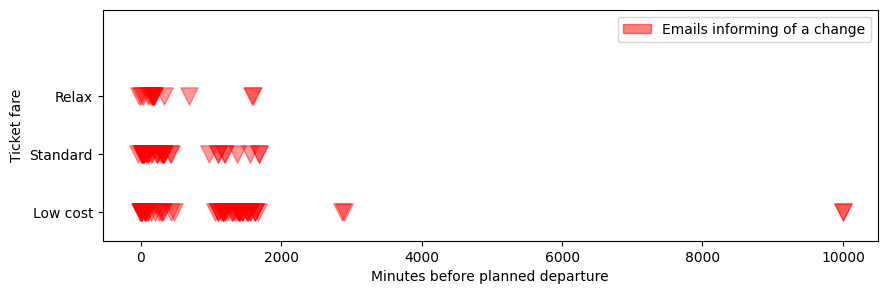

In [2]:
changes_time()

Nabízí se brát vpotaz pouze ty zrušené jízdenky, které byly zrušeny ~2000 minut nebo méně před odjezdem. Přibližme si to tedy...

(pro zajímavost, ty změny, které byly ohlášeny mnohem déle předem než většina, jsou zrušení vagónu, ve kterém měl člověk zakoupenou jízdenku. V mých datech se to stalo jen lowcost jízdenkám, ale taky jen asi 3x, takže to nejde úplně zanalyzovat)

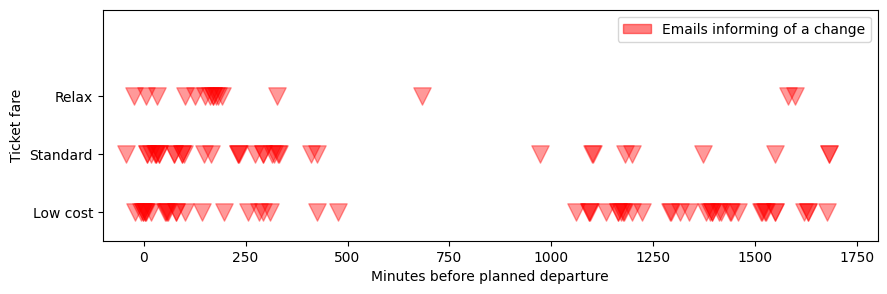

In [3]:
changes_time(cut=True)

Upozornění, co přišly až po čase jízdenky, mě vyděsily, ale jsou validní, jedná se o upozornění ohledně zpoždění vlaku. Měli bychom je počítat do statistiky, i když se 100% týkají celého vlaku nehledě na tarif? Já je počítat budu. Kdybychom je vyřadili, nejspíš by to zvýraznilo rozdíl mezi počtem změn v relaxech vs low costech, ale pointa této práce není objevit zda existuje nějaký rozdíl, nýbrž má odhalit, jestli je možné si šanci na změnu *signifikantně* zmenšit koupením dražší jízdenky. 

Počítejme tedy zrušené jízdenky jen pokud byly zrušeny někdy později než 1800 minut (30h) před odejzdem, zleva žádnou hranici nedávejme. Graf nám ale prozrazuje ještě jednu nečekanou informaci... 

### Máme špatný (zaujatý) sample relaxu?

Změny v relaxu vypadají, že se dějou až mnohem blíže k odjezdu (**nebo minimálně jsou takto pozdě oznámeny**). Důvodů může být mnoho, ale musíme zkontrolovat, že to není tím, že se relax obvykle kupuje později (tj. dříve k odjezdu). Pokud by to byla pravda, tak by to mohlo velice ovlivnit kolik "schytá" změn.

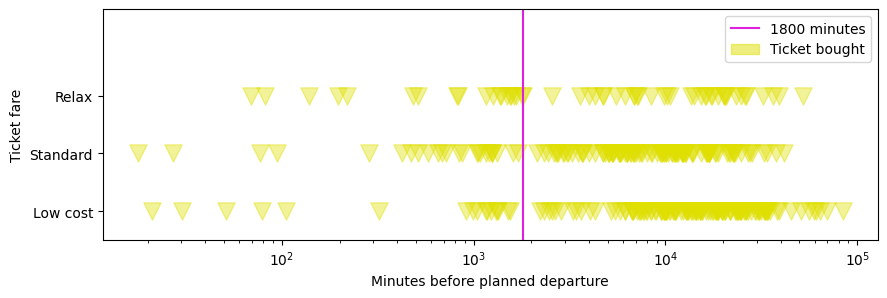

Průměrný čas před lowcost odjezdem: 16778
Průměrný čas před standard odjezdem: 9306
Průměrný čas před relax odjezdem: 10604


In [4]:
fare_buy_time()

Ne, i když je relax jízdenek poměrově více do 1000 minut než v ostatních tarifech, stále jich je převážná většina starších. Tento zvyk regiojetu nám tedy hezky hraje do karet a zvyšuje šanci, že dojdem k závěru, že regiojet nadržuje bohatším.

## Zpět k tématu

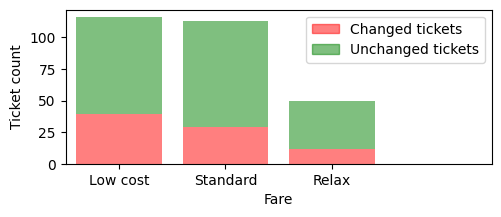

In [5]:
changes_bargraph()


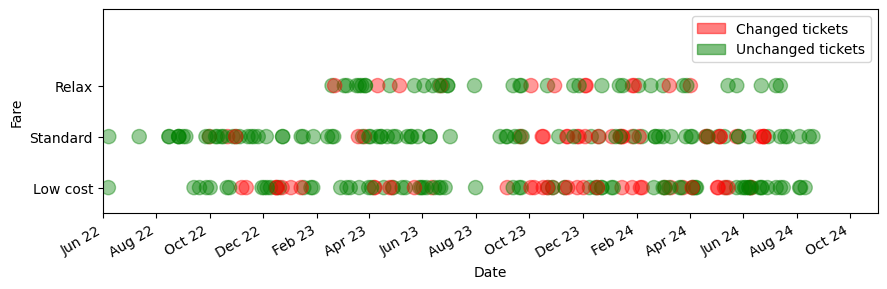

In [6]:
regio_through_time()

Na grafech můžeme vidět, že se dějou 2 věci, což je až o **1** více, než jsem předpokládal. Na prvním grafu to vypadá, že rozdíl ve změnách v relaxu oproti lowcostu nebo standardu není tak signifikantní. Na druhém to vypadá, že se regiojet s časem docela zhoršil, co se počtu upozornění týče. Podívejme se tedy prvně jestli spolehlivost regiojetu neupadá...

### Regiojet upadá(?)

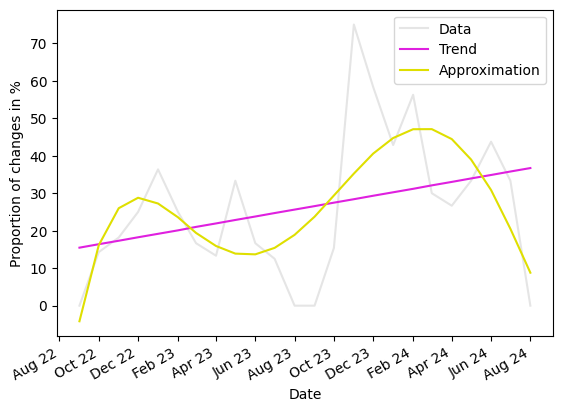

Směrodatná odchylka: 19.13%


In [7]:
regio_trend()

Ačkoliv to vypadá, že časem se počet změn zvyšuje, při jemněší aproximaci jde vidět, že počet změn je velice proměnlivý, pravděpodobně závislý na ročním období (proměnlivost potvrzuje i směrodatná odchylka). Pro přesnější závěr by to chtělo data z delšího časového úseku. Avšak se musíme vrátit k původní otázce, protože proměnlivost dat může být způsobena i proměnlivostí toho, jaké tarify jsme kupovali kdy!

Mějme tedy nulovou hypotézu "RegioJet se chová k zákazníkům fér nehledě na zakoupený tarif" a pojďme se ji pokusit vyvrátit. 

### Metoda
Nabízí se použít buďto *Pearsonův korelační koeficient* nebo *Spearmanův korelační koeficient*. Našel jsem hodně debat ohledně vlivu normality dat na P.k. koeficient. Někteří tvrdí, že předpoklad normality je zbytečně silný, někteří že je potřebný, někteří že některé **testy** ho potřebují a některé ne. Rozhodl jsem se tedy, že se svou polovinou bakalářského titulu nebudu rozhodovat, který doktor statistiky má pravdu, a použiji test Spearmanova k. k., který podle článku ( https://psycnet.apa.org/record/2017-12411-021 ), který cituje autor scipy v dokumentaci, není normalitou ovlivňován. P-value budeme požadovat nejvýše 0.05.

In [8]:
fares = list(map(lambda r: r[1], rides))
changes = list(map(lambda r: 0 if r[2] else 1, rides))

result = st.spearmanr(fares, changes)

print(f"Spearmanův korelační koeficient: {result.statistic}")
print(f"p-value: {result.pvalue}")

Spearmanův korelační koeficient: 0.09014355576744658
p-value: 0.1330987182391534


p-value je daleko nad 0.05 a nulové hypotéze tedy jsem nucen nadále věřit. Moje poslední záchrana je si ještě ověřit, jestli jsem měl vůbec důvod podezřívat RegioJet ze znevýhodňování chudých, pojďme si tedy ještě spočítat pár základních statistik...

In [9]:
print_change_percentage()
print_change_percentage(fare=1)
print_change_percentage(fare=2)
print_change_percentage(fare=3)

Podíl změněných jízdenek: 28.67%
Podíl změněných jízdenek tarifu "low cost": 33.62%
Podíl změněných jízdenek tarifu "standard": 25.66%
Podíl změněných jízdenek tarifu "relax": 24.0%


Zajímavé, z těchto výsledků to vypadá, že možná regiojet znevýhodňuje pouze své nejchudší cestující a výše už mezi nimi nerozlišuje! Další nulová hypotéza bude "RegioJet znevýhodňuje své nejchudší cestující podobně často, jako ty ostatní" a zkusíme stejnou metodu jako výše...

In [10]:
fares = list(map(lambda r: 1 if r[1] == 1 else 2, rides))
changes = list(map(lambda r: 0 if r[2] else 1, rides))

result = st.spearmanr(fares, changes)

print(f"Spearmanův korelační koeficient: {result.statistic}")
print(f"p-value: {result.pvalue}")

Spearmanův korelační koeficient: 0.09227775144225475
p-value: 0.12412075976554762


Rozdíl se stále nezdá být statisticky signifikantní... Zdá se, že RegioJet je skvělá firma a všechny své zákazníky znevýhodňuje podobně často.


## Čas na p-hacking
Přece nemůžeme práci zakončit neúspěchem, za to nám nikdo nezaplatí! Zkusíme experiment opakovat pořád dokola, dokud nám nevyjde hledaná p-value

In [11]:
the_only_pvalue = 1
tries = 0
while(the_only_pvalue > 0.05):
    tries += 1
    fares, changes = get_random_specimen(0.7)

    the_only_pvalue = st.spearmanr(fares, changes).pvalue

print(f"P-value: {the_only_pvalue}")
print(f"Počet pokusů: {tries}")

P-value: 0.011234653657453247
Počet pokusů: 24


To by ale v realitě docela trvalo. Pojďme p-hackovat chytřeji. *Nikdo* se nebude zlobit, když místo 250 vzorků budu mít 130 a stejně nás přece nejvíce zajímá období, kdy se "Důležité upozornění" *opravdu děly*, pojďme tedy naše jízdenky omezit třeba takhle:

In [12]:
fares = list(map(lambda r: r[1], rides))[27:158]
changes = list(map(lambda r: 0 if r[2] else 1, rides))[27:158]

result = st.spearmanr(fares, changes)

print(f"p-value: {result.pvalue}")

p-value: 0.018778544275588328



## Závěr
Tato práce se pokusila dokázat, že RegioJet není fér, avšak se jí to nepovedlo. Percentuálně se sice může zdát, že levnější jízdenky zažívají více změn, není to však statisticky signifikantní rozdíl. Tato práce je hlavně varování před pochybnými články, které své závěry vyvozují pouze z pohledu na graf, a před tím, jak snadný je p-hacking. Uzavřeme to následujícím **zavádějícím** grafem, který má v sobé totožná data jako bar graph výše, ale používá logaritmickou škálu...

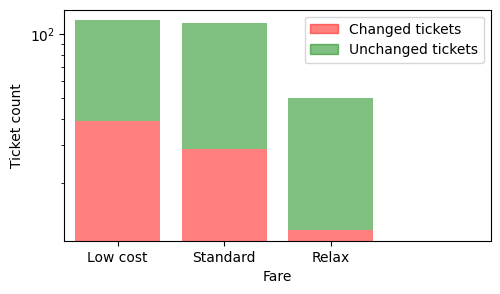

In [13]:
shady_graph()